In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
age = pd.read_csv('insurance.csv')

In [3]:
data = pd.read_csv('bmi.csv')

In [4]:
age.shape

(1338, 7)

In [5]:
data.drop('Index',axis='columns', inplace=True)

In [6]:
age


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
age = age['age']

In [8]:
data = data.join(age)

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])

In [10]:
data
#female:1
#male:0
#columns index that reperesent the bmi = weigh/high*high
#bmi < 18.5 underweigh
#18.5 < bmi < 24.9 normal
#25.0 < bmi < 29.9 overweigh
#bmi > 30.0 obese

,Gender,Height,Weight,age
0,1,174,96,19
1,1,189,87,18
2,0,185,110,28
3,0,195,104,33
4,1,149,61,32
...,...,...,...,...
495,0,150,153,20
496,0,184,121,31
497,0,141,136,45
498,1,150,95,44


In [11]:
#data['bmi'] = [x/y**2 for x,y in data[['Weight', 'Height']]]

In [12]:
bmi=[]
for x in zip(data['Height'], data['Weight']):
    a = x[1]/ x[0]**2
    bmi.append(a*10000)
    a+=1

In [13]:
bmi = pd.Series(bmi, name='bmi')

In [14]:
data = data.join(bmi)

In [15]:
def stat(x):
    if x < 18.5:
         return 0
    elif 18.5 <= x and x <= 24.9:
         return 1
    elif 25.0 <= x and x <= 29.9:
        return 2
    elif x > 30.0:
        return 3
data['status'] = data['bmi'].apply(stat)

In [16]:
data.dropna(inplace=True)

In [17]:
y = data['status']
x = data.iloc[:, :5]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [20]:
x_train.shape

(347, 5)

In [21]:
y_train

314    1.0
39     1.0
415    3.0
388    2.0
383    3.0
      ... 
257    3.0
72     3.0
399    3.0
236    3.0
37     3.0
Name: status, Length: 347, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score, confusion_matrix

In [23]:
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', C=10)
model.fit(x_train, y_train)

/home/hassan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [32]:
logesticpre = model.predict(x_test)
model.score(x_test, logesticpre)

1.0

In [33]:
print(round(accuracy_score(y_test, logesticpre),2)*100)

96.0


In [34]:
a = 0, 182, 69,22,20.8308 
a = np.array(a)
pre = model.predict(a.reshape(1,-1))
a

array([  0.    , 182.    ,  69.    ,  22.    ,  20.8308])

In [35]:
print(confusion_matrix(y_test, logesticpre))

[[ 10   1   0   0]
 [  4  14   0   0]
 [  0   1  14   0]
 [  0   0   0 105]]


In [36]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(x_train, y_train)
model_tree_p = model_tree.predict(x_test)
print(round(accuracy_score(y_test, model_tree_p),2)*100)

100.0


# GUI TKINTER :

In [ ]:
from tkinter import Tk,Button,Label,Entry,LEFT,StringVar,W,N,E,S,Frame,Radiobutton,Checkbutton,IntVar,ACTIVE, messagebox


window=Tk()

agevar=IntVar()
heightvar=IntVar()
weightvar=IntVar()

def sumbmitForm():
    global predict
    global result
    #print("Age : "+ str(agevar.get()))
    #print("height : "+ str(heightvar.get()))
    #print("weight : "+ str(weightvar.get()))
    #print('BMI: '+ str((weightvar.get() / heightvar.get() ** 2 )*10000 ))
    #print("Gender : "+ str(value_radio.get()))
    result = str(value_radio.get()) , str(heightvar.get()) , str(weightvar.get()) ,str(agevar.get()) ,str((weightvar.get() / heightvar.get() ** 2 )*10000 ) 
    result = np.array(result, dtype='float64').reshape(1, -1)
    predict = model.predict(result)
    
    if 0 in [int(predict)]:
         messagebox.showinfo(title='status body', message='underweight')
    elif 1 in [int(predict)]:
         messagebox.showinfo(title='status body', message='normal')
    elif 2 in [int(predict)]:
         messagebox.showinfo(title='status body', message='overweight')
    elif 3 in [int(predict)]:
         messagebox.showinfo(title='status body', message='obese')

    print(result)
    if value_radio.get() == 1:
        print('female')
    elif value_radio.get() == 0:
        print('male')

    
label_age=Label(window,text="Age : ").pack(padx=15,pady=5,anchor=N)
username=Entry(window,textvariable=agevar).pack(padx=15,pady=5,anchor=N)


label_height=Label(window,text="Height : ").pack(padx=15,pady=5,anchor=N)
height=Entry(window,textvariable=heightvar).pack(padx=15,pady=5,anchor=N)

label_weight=Label(window,text="weight : ").pack(padx=15,pady=5,anchor=N)
weight=Entry(window,textvariable=weightvar).pack(padx=15,pady=5,anchor=N)



value_radio=IntVar()
radio_male=Radiobutton(window,text="Male",value=0,variable=value_radio,width=10).pack(padx=15,pady=5,anchor=N)
radio_female=Radiobutton(window,text="Female",value=1,variable=value_radio,width=10).pack(padx=15,pady=5,anchor=N)

#hiding radio button circle use indicatoron=0
value_radio.set(0)

#val_1=IntVar()
#val_2=IntVar()
#val_3=IntVar()

#check_button_1=Checkbutton(window,text="PHP",variable=val_1).pack()
#check_button_2=Checkbutton(window,text="JAVA",variable=val_2).pack()
#check_button_3=Checkbutton(window,text="Python",variable=val_3).pack()
#val_1.set(1)

submit=Button(window,text="Submit",command=sumbmitForm).pack(padx=15,pady=5,anchor=N)

window.mainloop()

In [37]:
data

,Gender,Height,Weight,age,bmi,status
0,1,174,96,19,31.708284,3.0
1,1,189,87,18,24.355421,1.0
2,0,185,110,28,32.140248,3.0
3,0,195,104,33,27.350427,2.0
4,1,149,61,32,27.476240,2.0
...,...,...,...,...,...,...
495,0,150,153,20,68.000000,3.0
496,0,184,121,31,35.739603,3.0
497,0,141,136,45,68.407022,3.0
498,1,150,95,44,42.222222,3.0


In [63]:
gp = data['status'].groupby([data['Gender'],data['age']]).count()

In [61]:
gp.sort_index(level='age', ascending=False)


Gender  age
1       64      6
0       64      4
1       63      7
0       63      5
1       62      3
               ..
0       20      3
1       19      8
0       19     24
1       18     17
0       18      9
Name: status, Length: 93, dtype: int64

In [67]:
a = data.pivot_table(values='status', index='age', columns='Gender',aggfunc='mean')

<AxesSubplot:xlabel='age'>

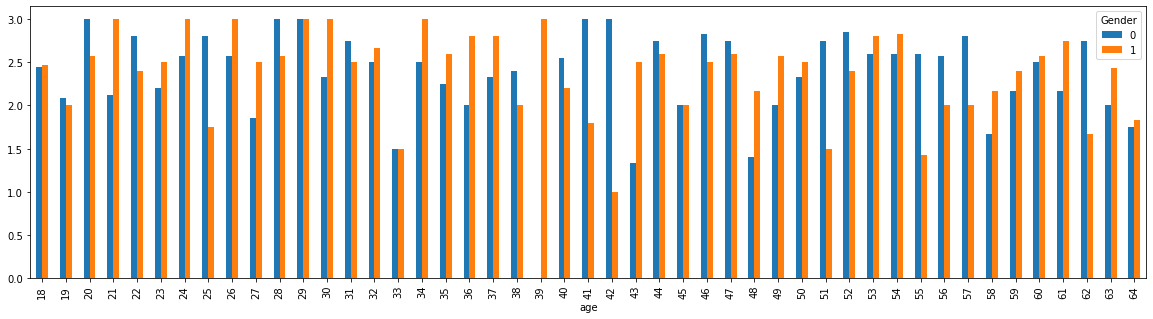

In [87]:
a.plot(kind='bar', figsize=(20,5))

In [128]:
maxbmi = data['bmi'].groupby([data['age'],data['Gender']], sort=True).min().sort_values()
maxbmi

age  Gender
18   0         12.753801
45   1         12.753801
35   0         13.015410
18   1         13.850416
38   0         13.850416
                 ...    
24   1         38.393156
26   1         38.455376
30   1         40.306122
34   1         40.613587
21   1         42.416898
Name: bmi, Length: 93, dtype: float64

<AxesSubplot:xlabel='age,Gender'>

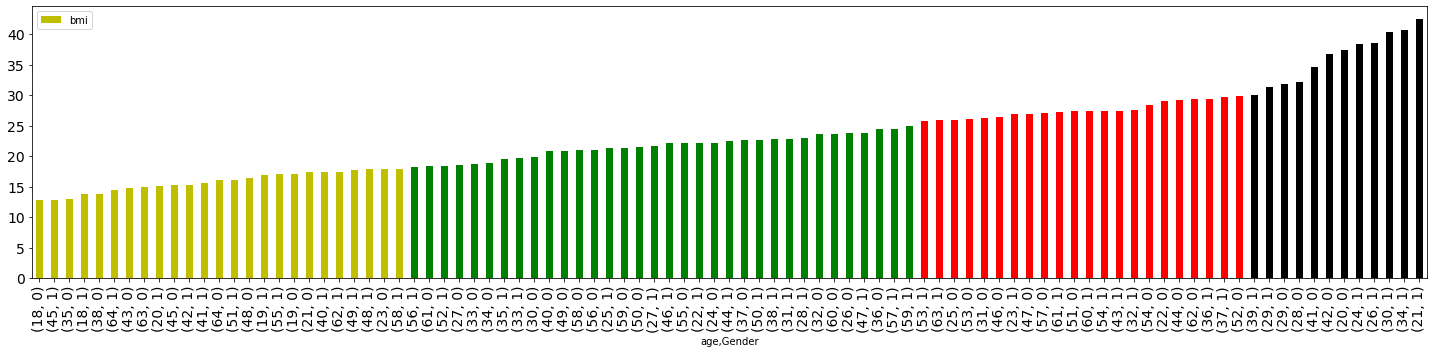

In [159]:
colors=[]
for x in maxbmi:
    if x < 18 :
        colors.append('y')
    elif 18 <= x and x <= 25:
        colors.append('g')
    elif 25 <= x and x <= 30:
        colors.append('r')
    else:
        colors.append('black')
        
maxbmi.plot(kind='bar', figsize=(25,5), legend=True, fontsize=14, color=colors)

In [173]:
x = data['Gender'].groupby(data['status']).count()
x

status
0.0     34
1.0     63
2.0     67
3.0    332
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

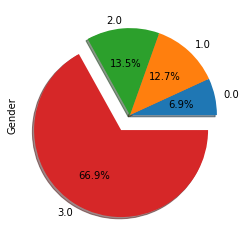

In [177]:
x.plot(kind='pie', shadow=True, autopct='%1.1f%%', explode=(0,0,0,0.2))

In [192]:
y = data.pivot_table(values='status', columns='Gender', index=data.index)
y

Gender,0,1
0,NaN,3.0
1,NaN,1.0
2,3.0,NaN
3,2.0,NaN
4,NaN,2.0
...,...,...
495,3.0,NaN
496,3.0,NaN
497,3.0,NaN
498,NaN,3.0


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

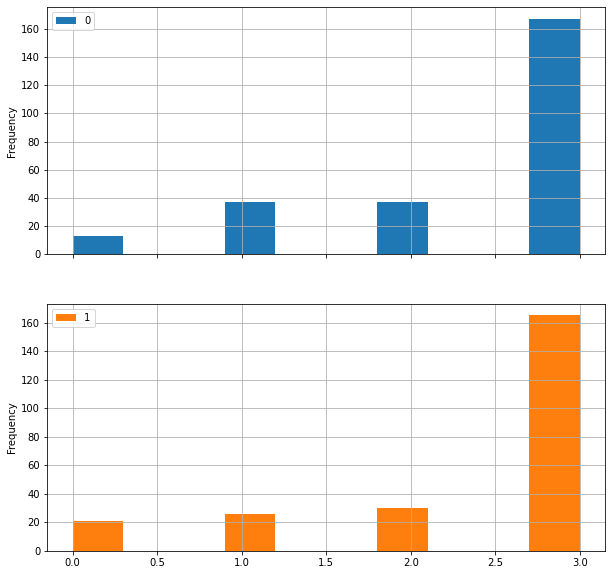

In [200]:
y.plot(kind='hist', subplots=True, figsize=(10,10), grid=True, ylabel='count')

In [201]:
data['Gender'].value_counts()

0    254
1    242
Name: Gender, dtype: int64

In [205]:
y[1].value_counts()

3.0    165
2.0     30
1.0     26
0.0     21
Name: 1, dtype: int64

In [204]:
y[0].value_counts()

3.0    167
1.0     37
2.0     37
0.0     13
Name: 0, dtype: int64